In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

# БПМИ203 old edition...
np.random.seed(203)

%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'


In [2]:
def parse_type(name):
    return "/".join(name.split('/')[1:-1])

def prepare_df(df):
    kMaxSize = None
    df["test_type"] = df["name"].apply(parse_type)
    if kMaxSize is not None:
        df = df[df["rows"] < kMaxSize]
    return df


In [3]:
df_info = pd.read_csv("tests_results/tests_info.csv")
df_info = prepare_df(df_info)
df_info


name    raws  columns  \
0                    tests_data/int/random_small/1.csv       1        1   
1                    tests_data/int/random_small/2.csv       2        1   
2                    tests_data/int/random_small/3.csv       3        1   
3                    tests_data/int/random_small/4.csv       4        1   
4                    tests_data/int/random_small/5.csv       5        1   
..                                                 ...     ...      ...   
494  tests_data/clickhouse/price_paid_transaction_d...   51010       16   
495  tests_data/clickhouse/price_paid_transaction_d...   61212       16   
496  tests_data/clickhouse/price_paid_transaction_d...   73455       16   
497  tests_data/clickhouse/price_paid_transaction_d...   88146       16   
498  tests_data/clickhouse/price_paid_transaction_d...  100000       16   

     serialized_size  compressed_size  compression_time_ns  \
0                  1                2                22867   
1                  2                3                  987   
2                  3                4                  647   
3                  4                5                  686   
4                  5                6                  660   
..               ...              ...                  ...   
494          8116666          4134736             30929955   
495          9739455          4966406             25912829   
496         11630726          5655915             32140025   
497         14022427          7143403             32520434   
498         15912171          8112115             36431279   

     decompression_time_ns                               test_type  test_size  
0                     2178                        int/random_small          1  
1                      286                        int/random_small          2  
2                      170                        int/random_small          3  
3                      179                        int/random_small          4  
4                      157                        int/random_small          5  
..                     ...                                     ...        ...  
494                5882589  clickhouse/price_paid_transaction_data      51010  
495                5337219  clickhouse/price_paid_transaction_data      61212  
496                7122908  clickhouse/price_paid_transaction_data      73455  
497                7525501  clickhouse/price_paid_transaction_data      88146  
498                8754951  clickhouse/price_paid_transaction_data     100000  

[499 rows x 9 columns]

In [4]:
df_algo = pd.read_csv("tests_results/algorithms_results.csv")
df_algo = prepare_df(df_algo)
df_algo


name  \
0                     tests_data/int/random_small/1.csv   
1                     tests_data/int/random_small/2.csv   
2                     tests_data/int/random_small/3.csv   
3                     tests_data/int/random_small/4.csv   
4                     tests_data/int/random_small/5.csv   
...                                                 ...   
2705  tests_data/clickhouse/price_paid_transaction_d...   
2706  tests_data/clickhouse/price_paid_transaction_d...   
2707  tests_data/clickhouse/price_paid_transaction_d...   
2708  tests_data/clickhouse/price_paid_transaction_d...   
2709  tests_data/clickhouse/price_paid_transaction_d...   

                              algorithm_name  find_permutation_time_ns  \
0                                   identity                       553   
1                                   identity                       200   
2                                   identity                        95   
3                                   identity                       181   
4                                   identity                       153   
...                                      ...                       ...   
2705  lexicographic sort online column order                 871566253   
2706  lexicographic sort online column order                1331881390   
2707  lexicographic sort online column order                1381689917   
2708  lexicographic sort online column order                1981177582   
2709  lexicographic sort online column order                2048324590   

      serialized_size  compressed_size  compression_time_ns  \
0                   1                2                  403   
1                   2                3                  331   
2                   3                4                  286   
3                   4                5                  315   
4                   5                6                  331   
...               ...              ...                  ...   
2705          8116666          3567010             15470051   
2706          9739455          4260032             18395604   
2707         11630726          4766830             23806800   
2708         14022427          6062312             35372895   
2709         15912171          6852517             33072745   

      decompression_time_ns                               test_type  test_size  
0                       243                        int/random_small          1  
1                       120                        int/random_small          2  
2                        89                        int/random_small          3  
3                       123                        int/random_small          4  
4                       122                        int/random_small          5  
...                     ...                                     ...        ...  
2705                4471781  clickhouse/price_paid_transaction_data      51010  
2706                5308757  clickhouse/price_paid_transaction_data      61212  
2707                6507532  clickhouse/price_paid_transaction_data      73455  
2708                7854838  clickhouse/price_paid_transaction_data      88146  
2709                9571618  clickhouse/price_paid_transaction_data     100000  

[2710 rows x 9 columns]

In [5]:
algorithm_names = df_algo["algorithm_name"].unique()
algorithm_names


array(['identity', 'shuffle-100000000', 'local-optimizations-100000000',
       'lexicographic sort', 'lexicographic sort offline column order',
       'lexicographic sort online column order'], dtype=object)

In [6]:
tests_types = df_algo["test_type"].unique()
tests_types


array(['int/random_small', 'int/many_random_small', 'int/random_big',
       'clickhouse/hits', 'english/dictionary', 'clickhouse/dish',
       'clickhouse/menu', 'clickhouse/menu_item', 'clickhouse/menu_page',
       'clickhouse/price_paid_transaction_data'], dtype=object)

In [7]:
def plot_for_test_type(test_type):
    plt.ion()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))

    fig.suptitle(f'Анализ алгоритмов для тестов из выборки {test_type}', fontsize=18)

    for algorithm_name in algorithm_names:
        subset = df_algo[(df_algo["test_type"] == test_type) & (df_algo["algorithm_name"] == algorithm_name)]    
        ax1.plot(subset['test_size'], subset['find_permutation_time_ns'] / 1000000000, label=algorithm_name)
        ax2.plot(subset['test_size'], subset['compressed_size'], label=algorithm_name)
        ax3.plot(subset['test_size'], subset['compression_time_ns'] / 1000000000, label=algorithm_name)
    
    subset = df_info[df_info["test_type"] == test_type]    
    ax2.plot(subset['test_size'], subset['serialized_size'], label="without compression")

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')

    # ax1.set_xscale('log')
    # ax2.set_xscale('log')
    # ax3.set_xscale('log')

    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')

    ax1.set_title('Зависимость времени выполнения от размера теста', fontsize = 15)
    ax2.set_title('Зависимость сжатого размера от размера теста', fontsize = 15)
    ax3.set_title('Зависимость времени сжатия от размера теста', fontsize = 15)

    ax1.set_xlabel('Размер теста (# строк)', fontsize = 15)
    ax1.set_ylabel('Время нахождения перестановки (s)', fontsize = 15)

    ax2.set_xlabel('Размер теста (#строк)', fontsize = 15)
    ax2.set_ylabel('Сжатый размер (bytes)', fontsize = 15)

    ax3.set_xlabel('Размер теста (#строк)', fontsize = 15)
    ax3.set_ylabel('Время на сжатие (s)', fontsize = 15)

    plt.show()


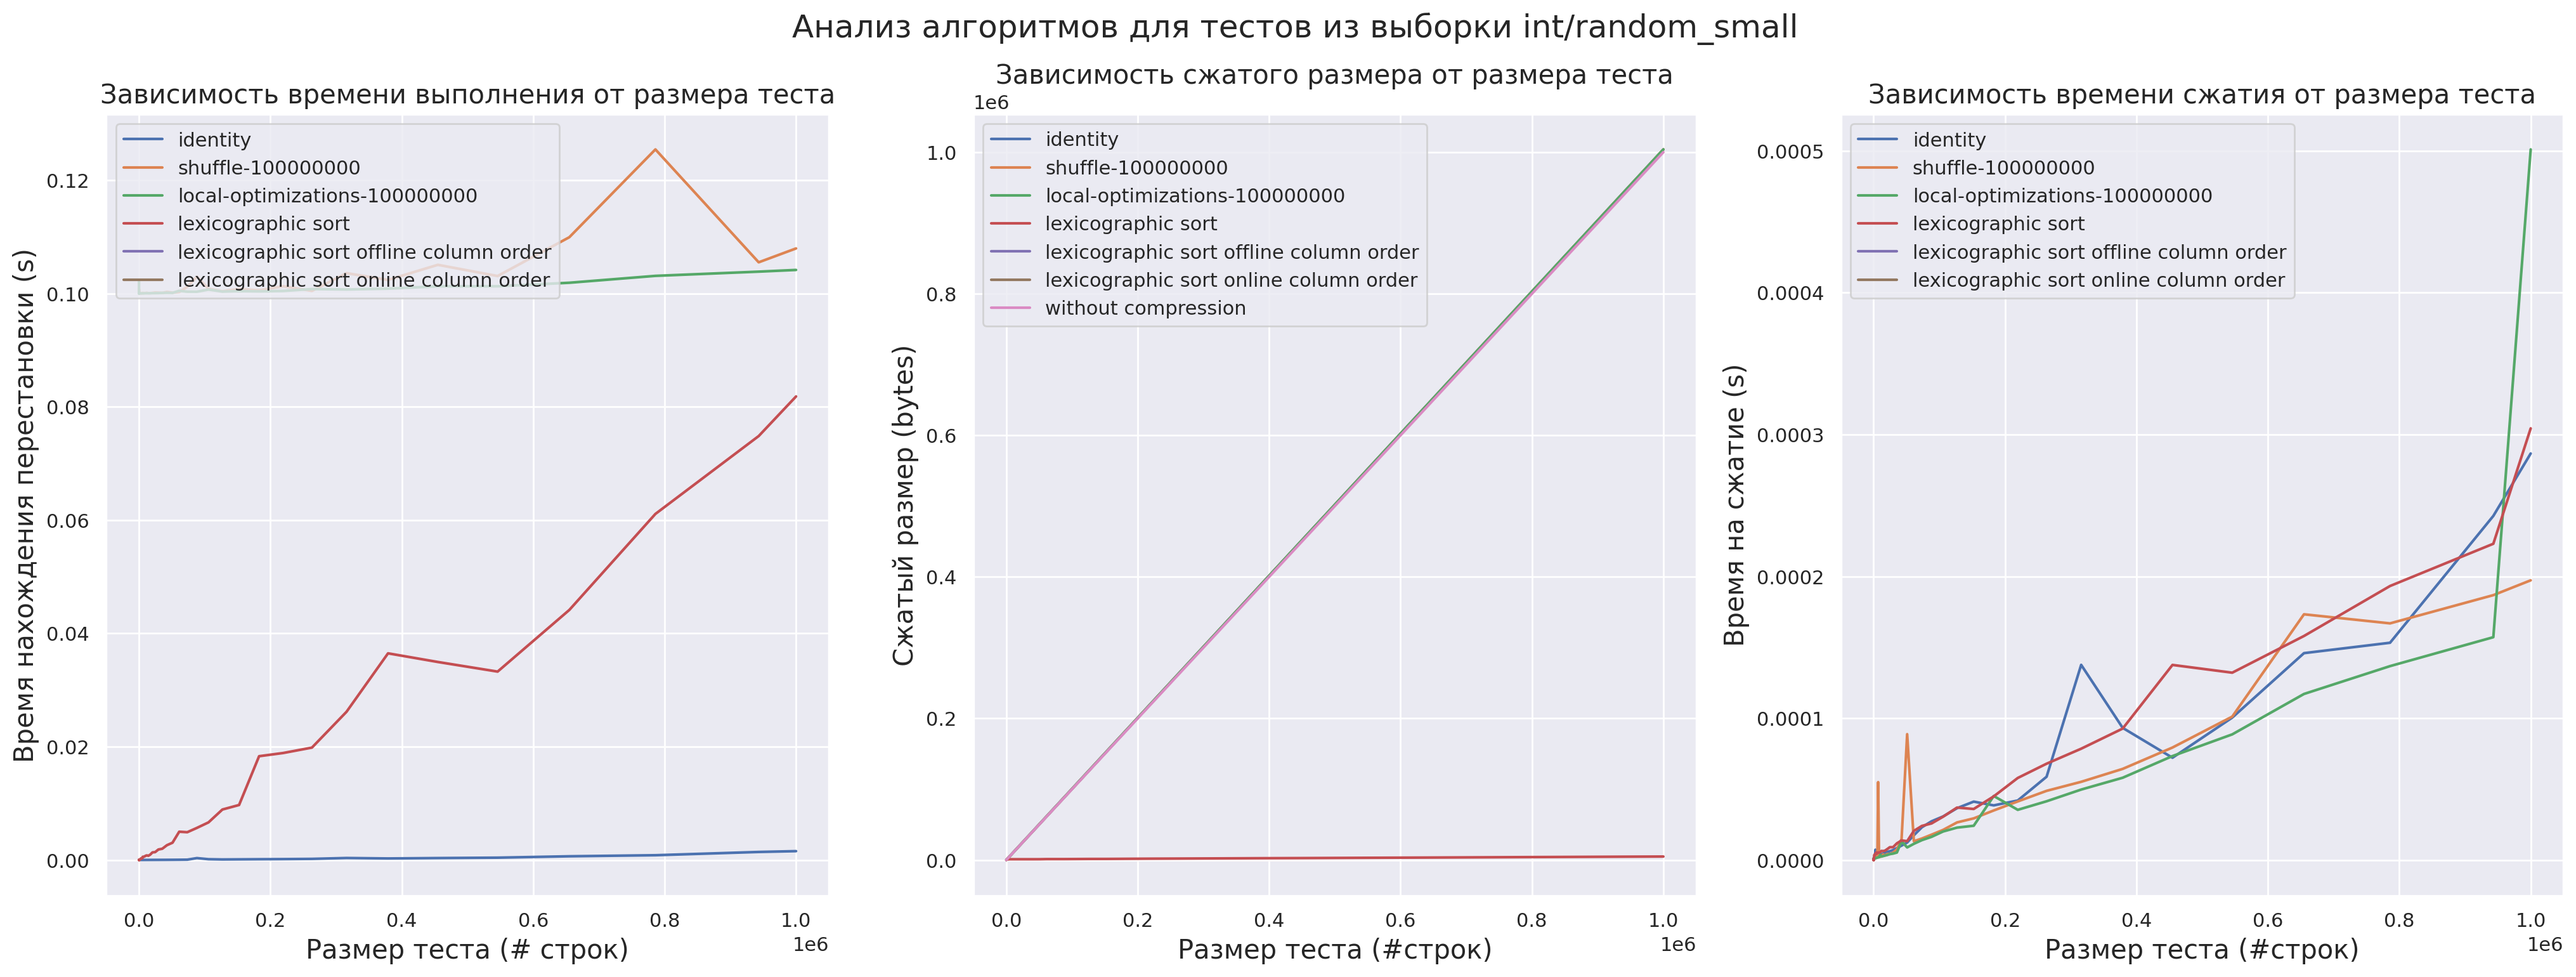

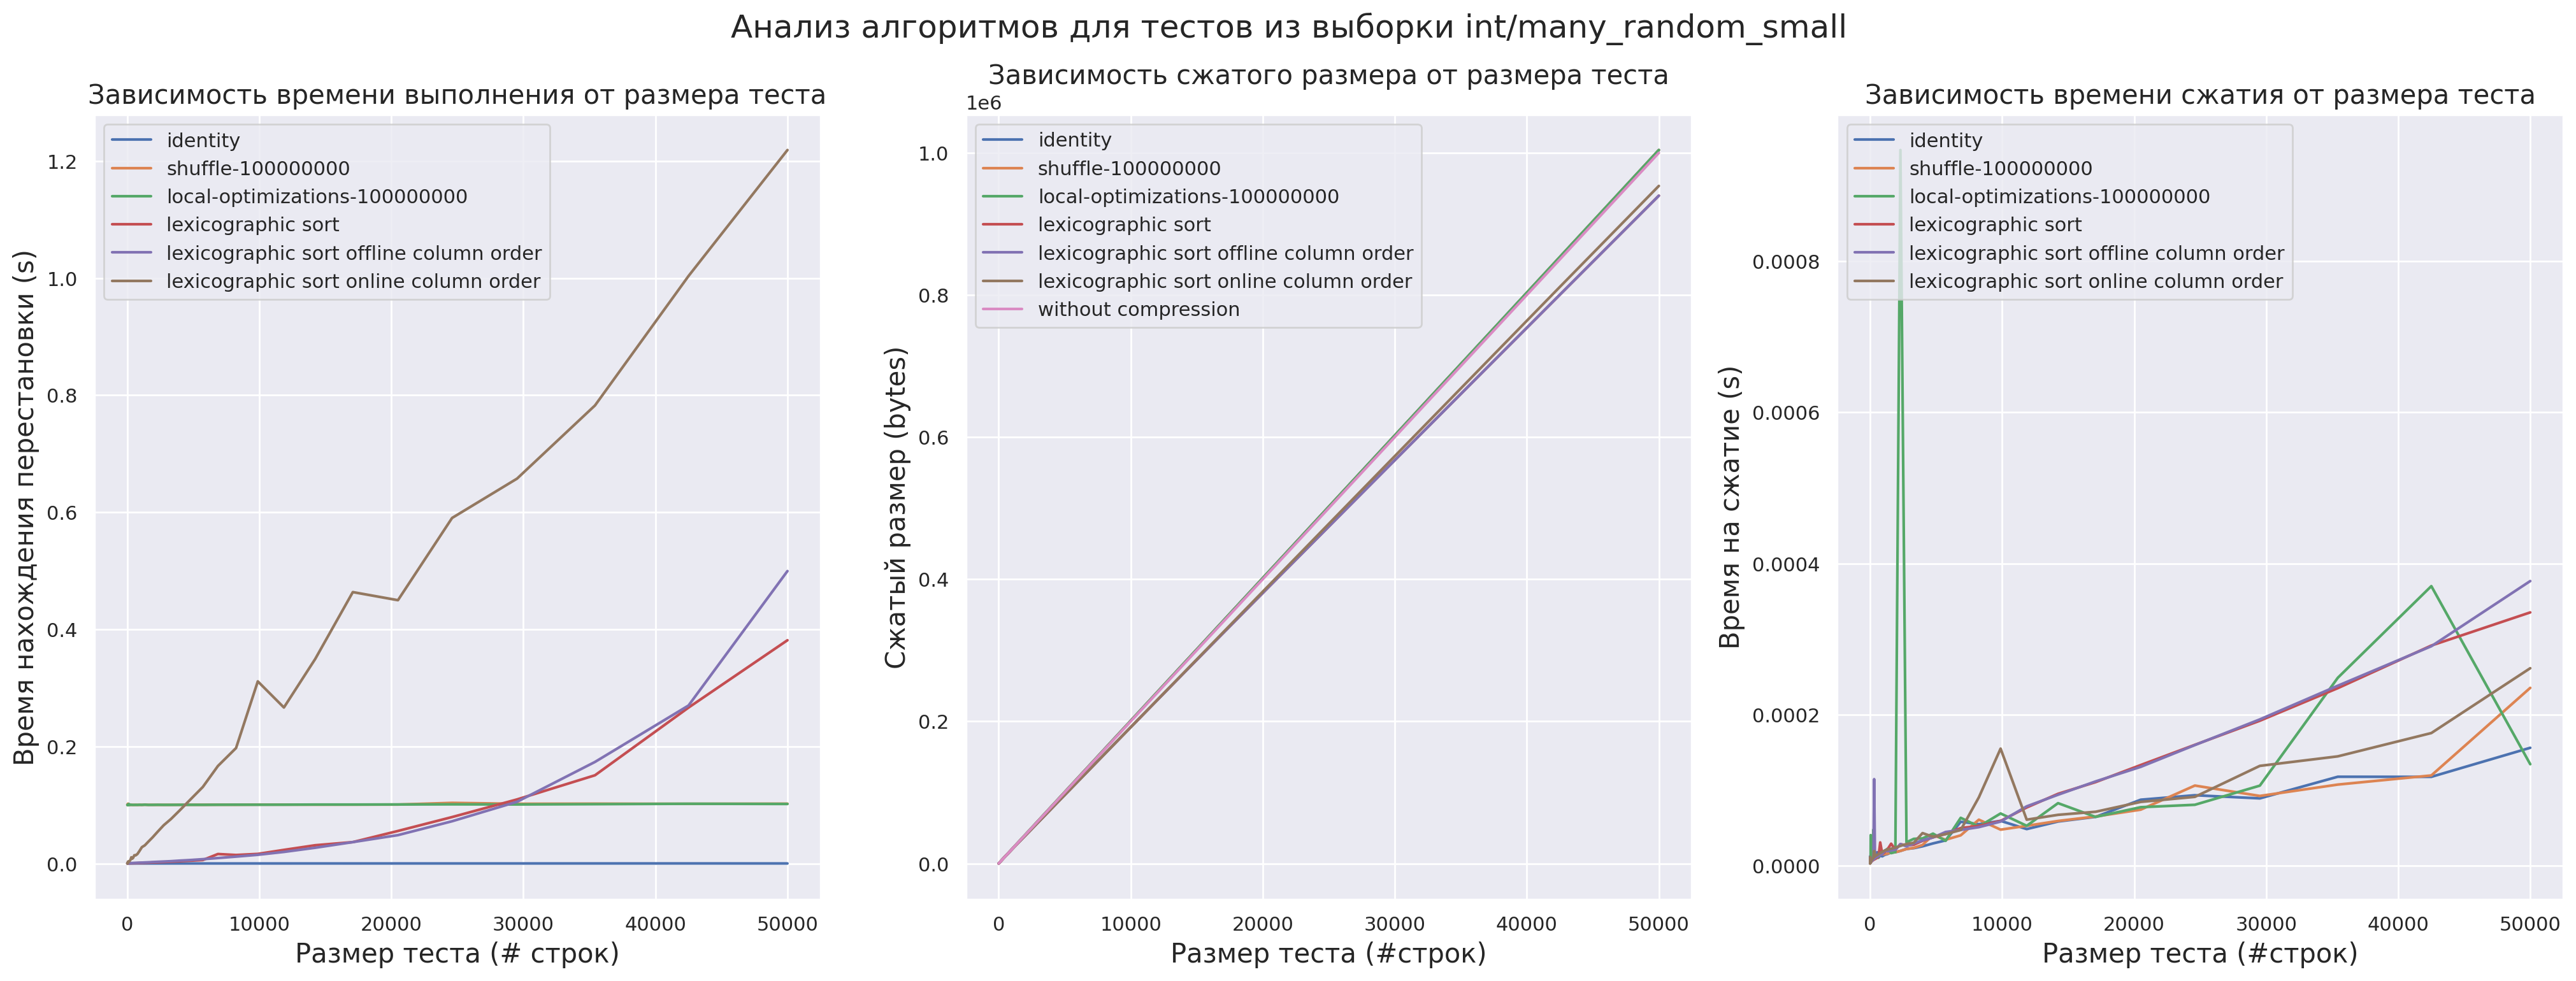

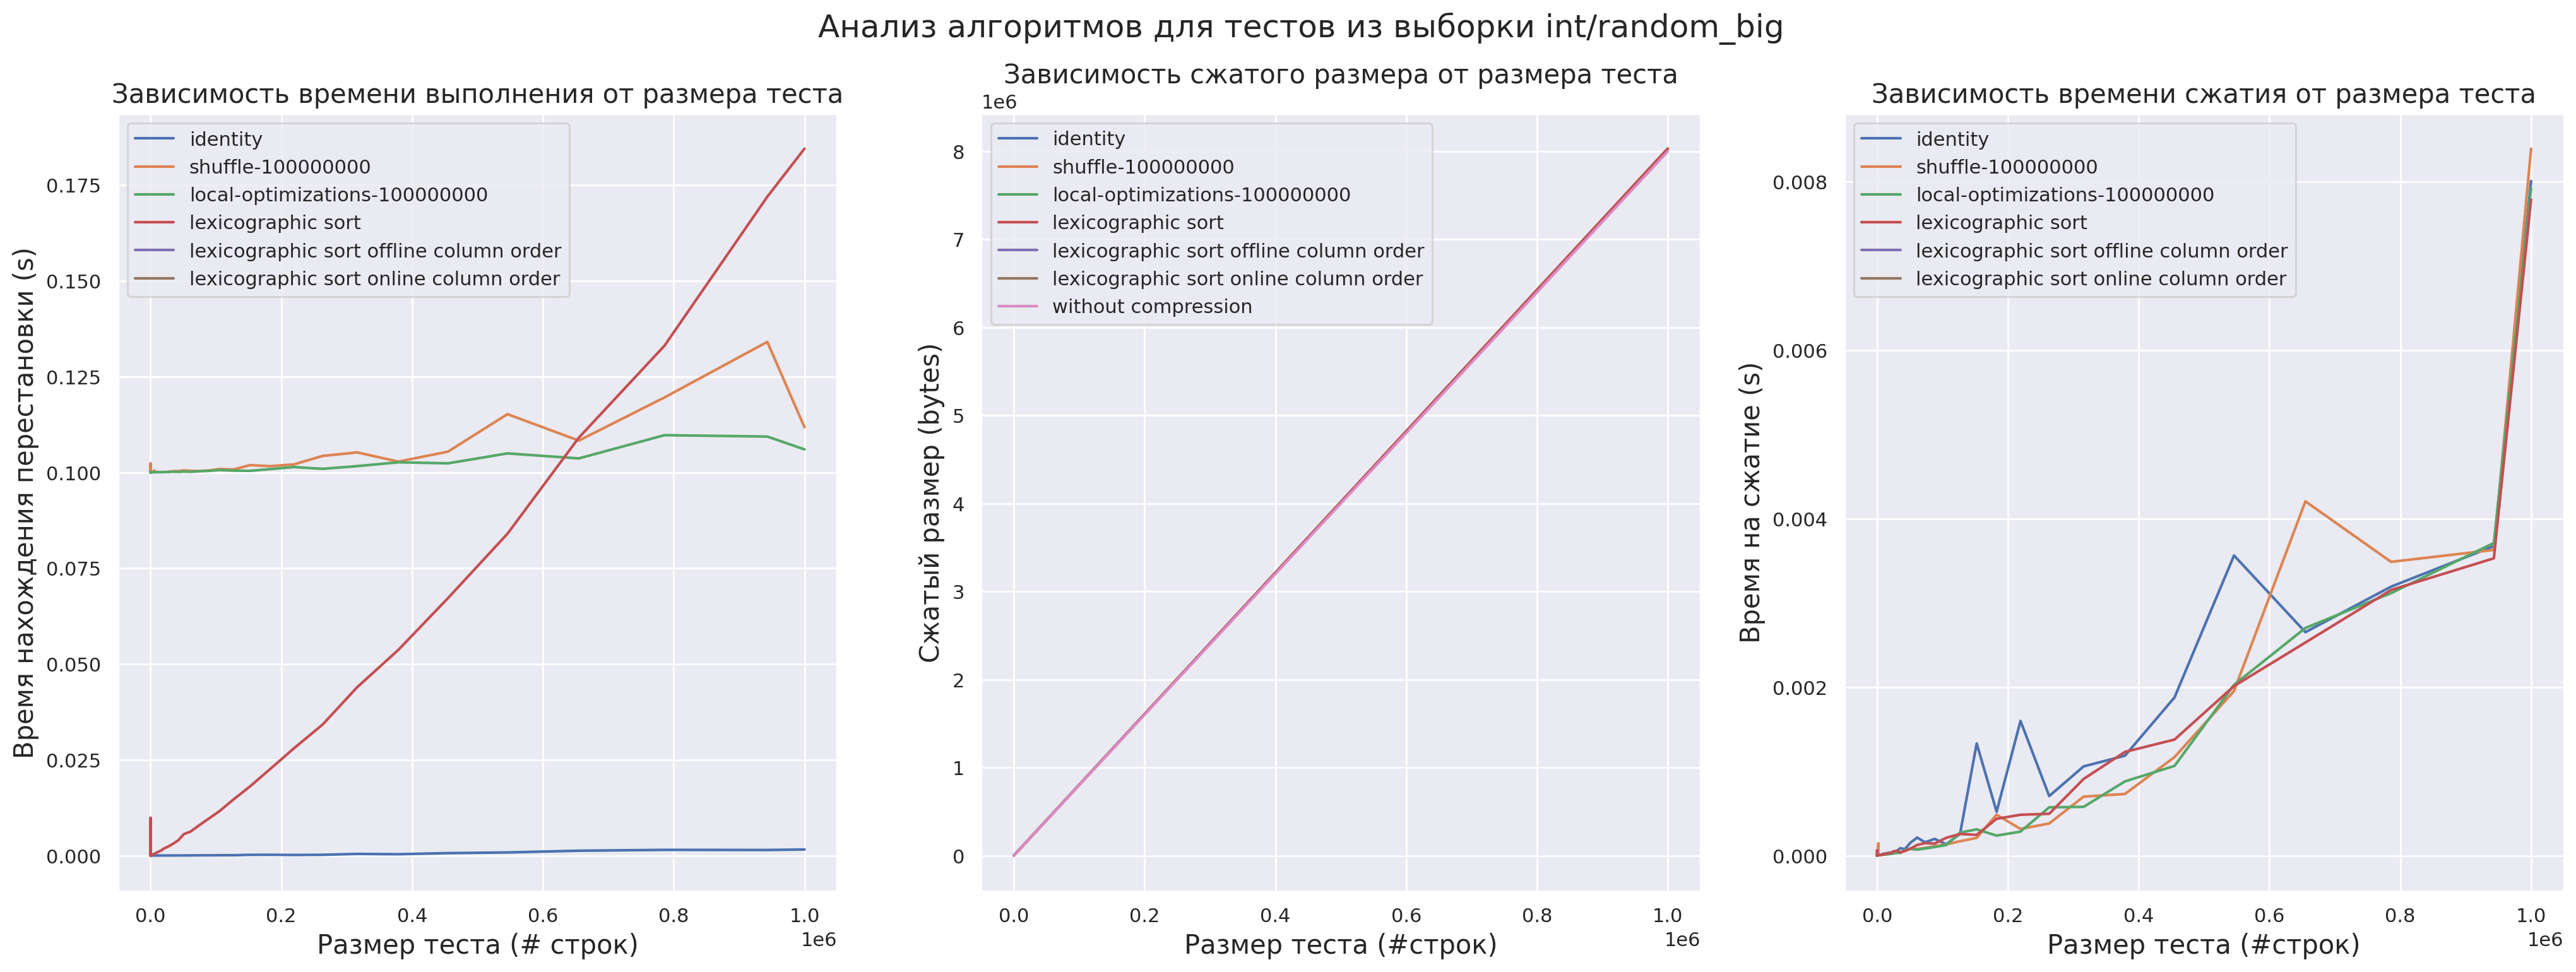

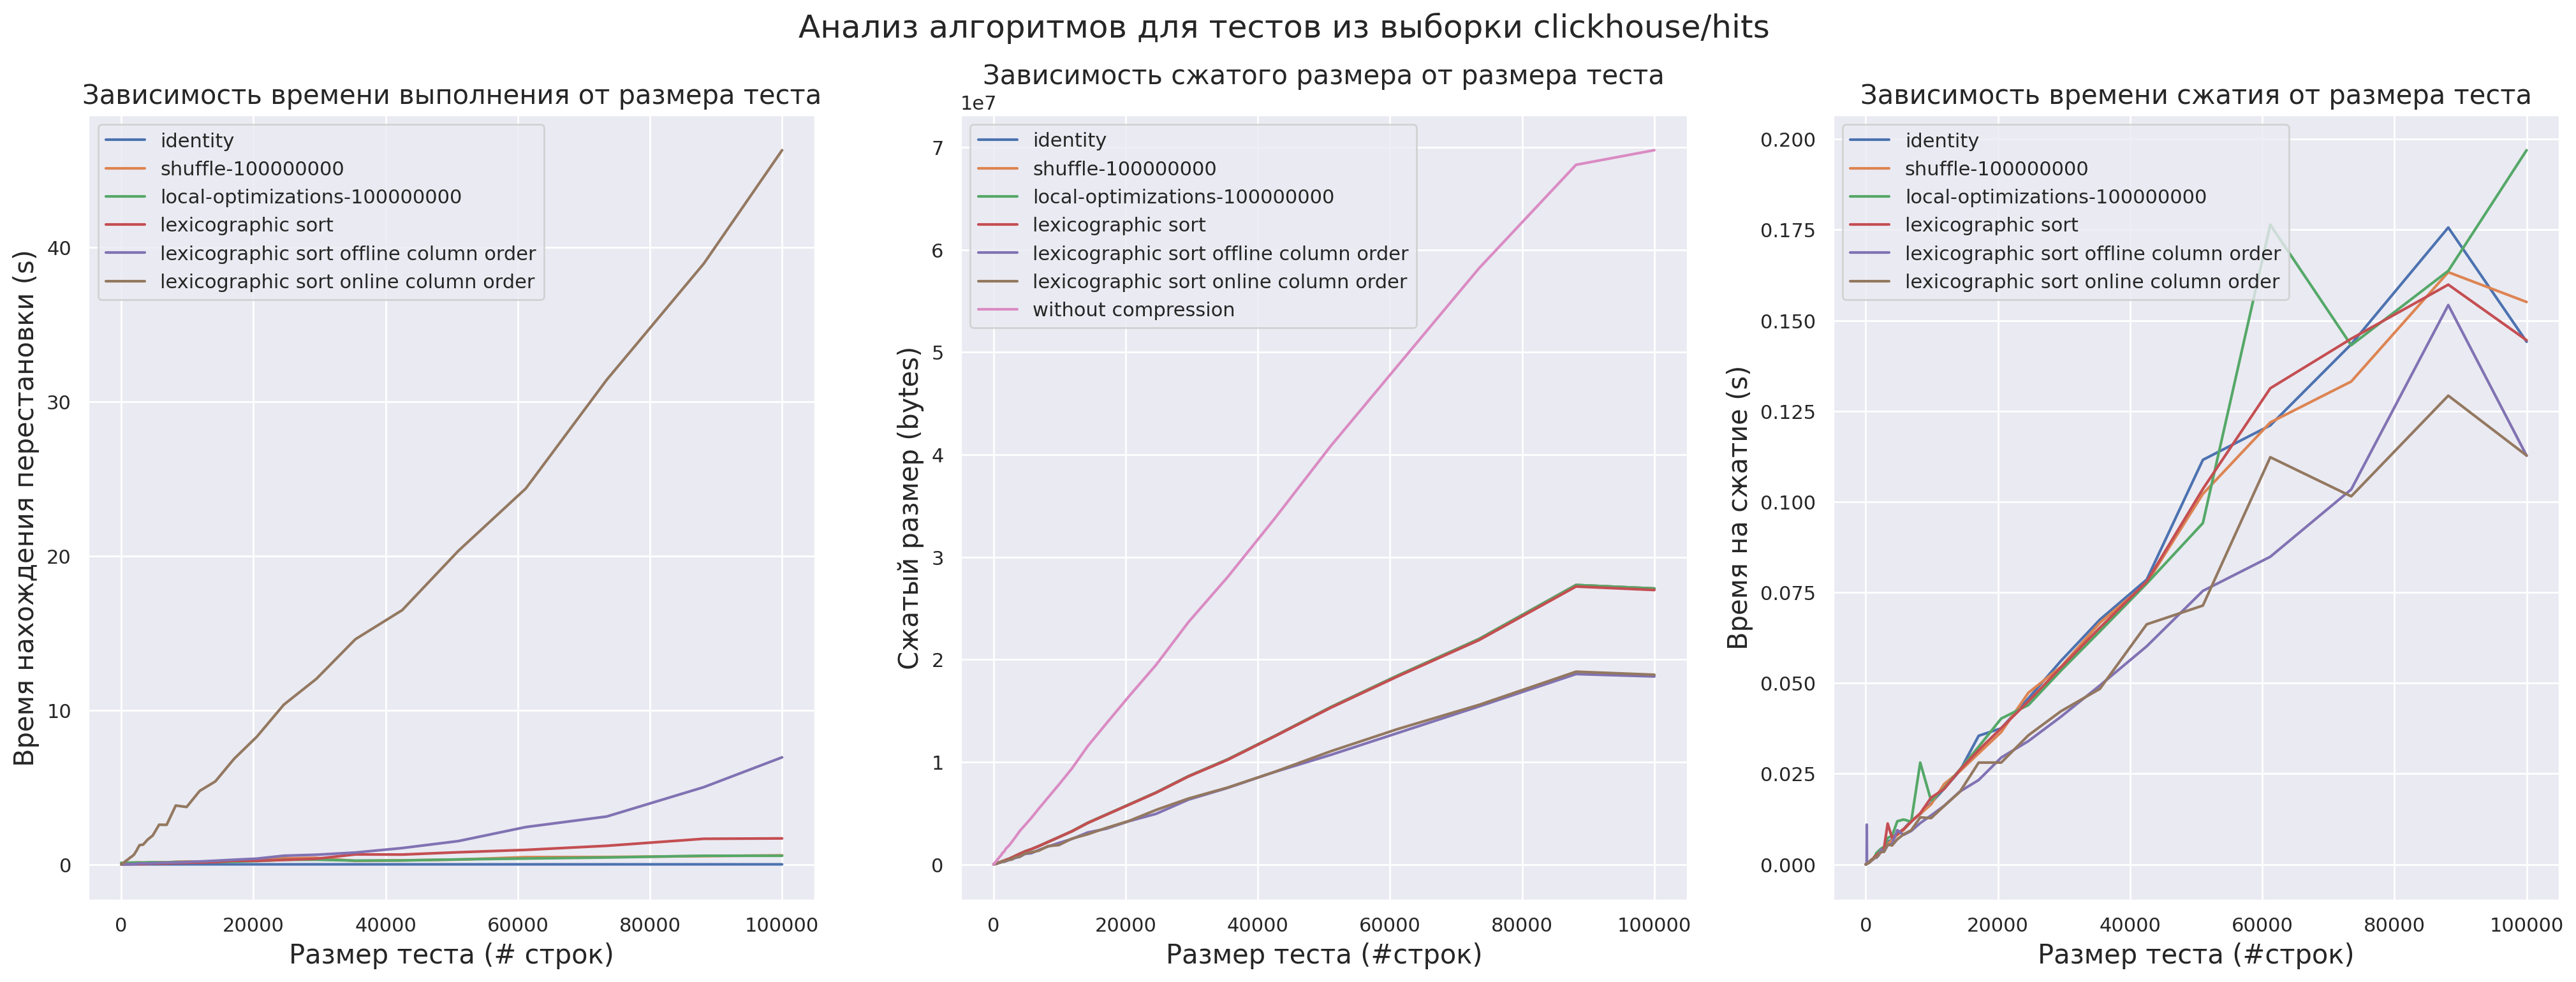

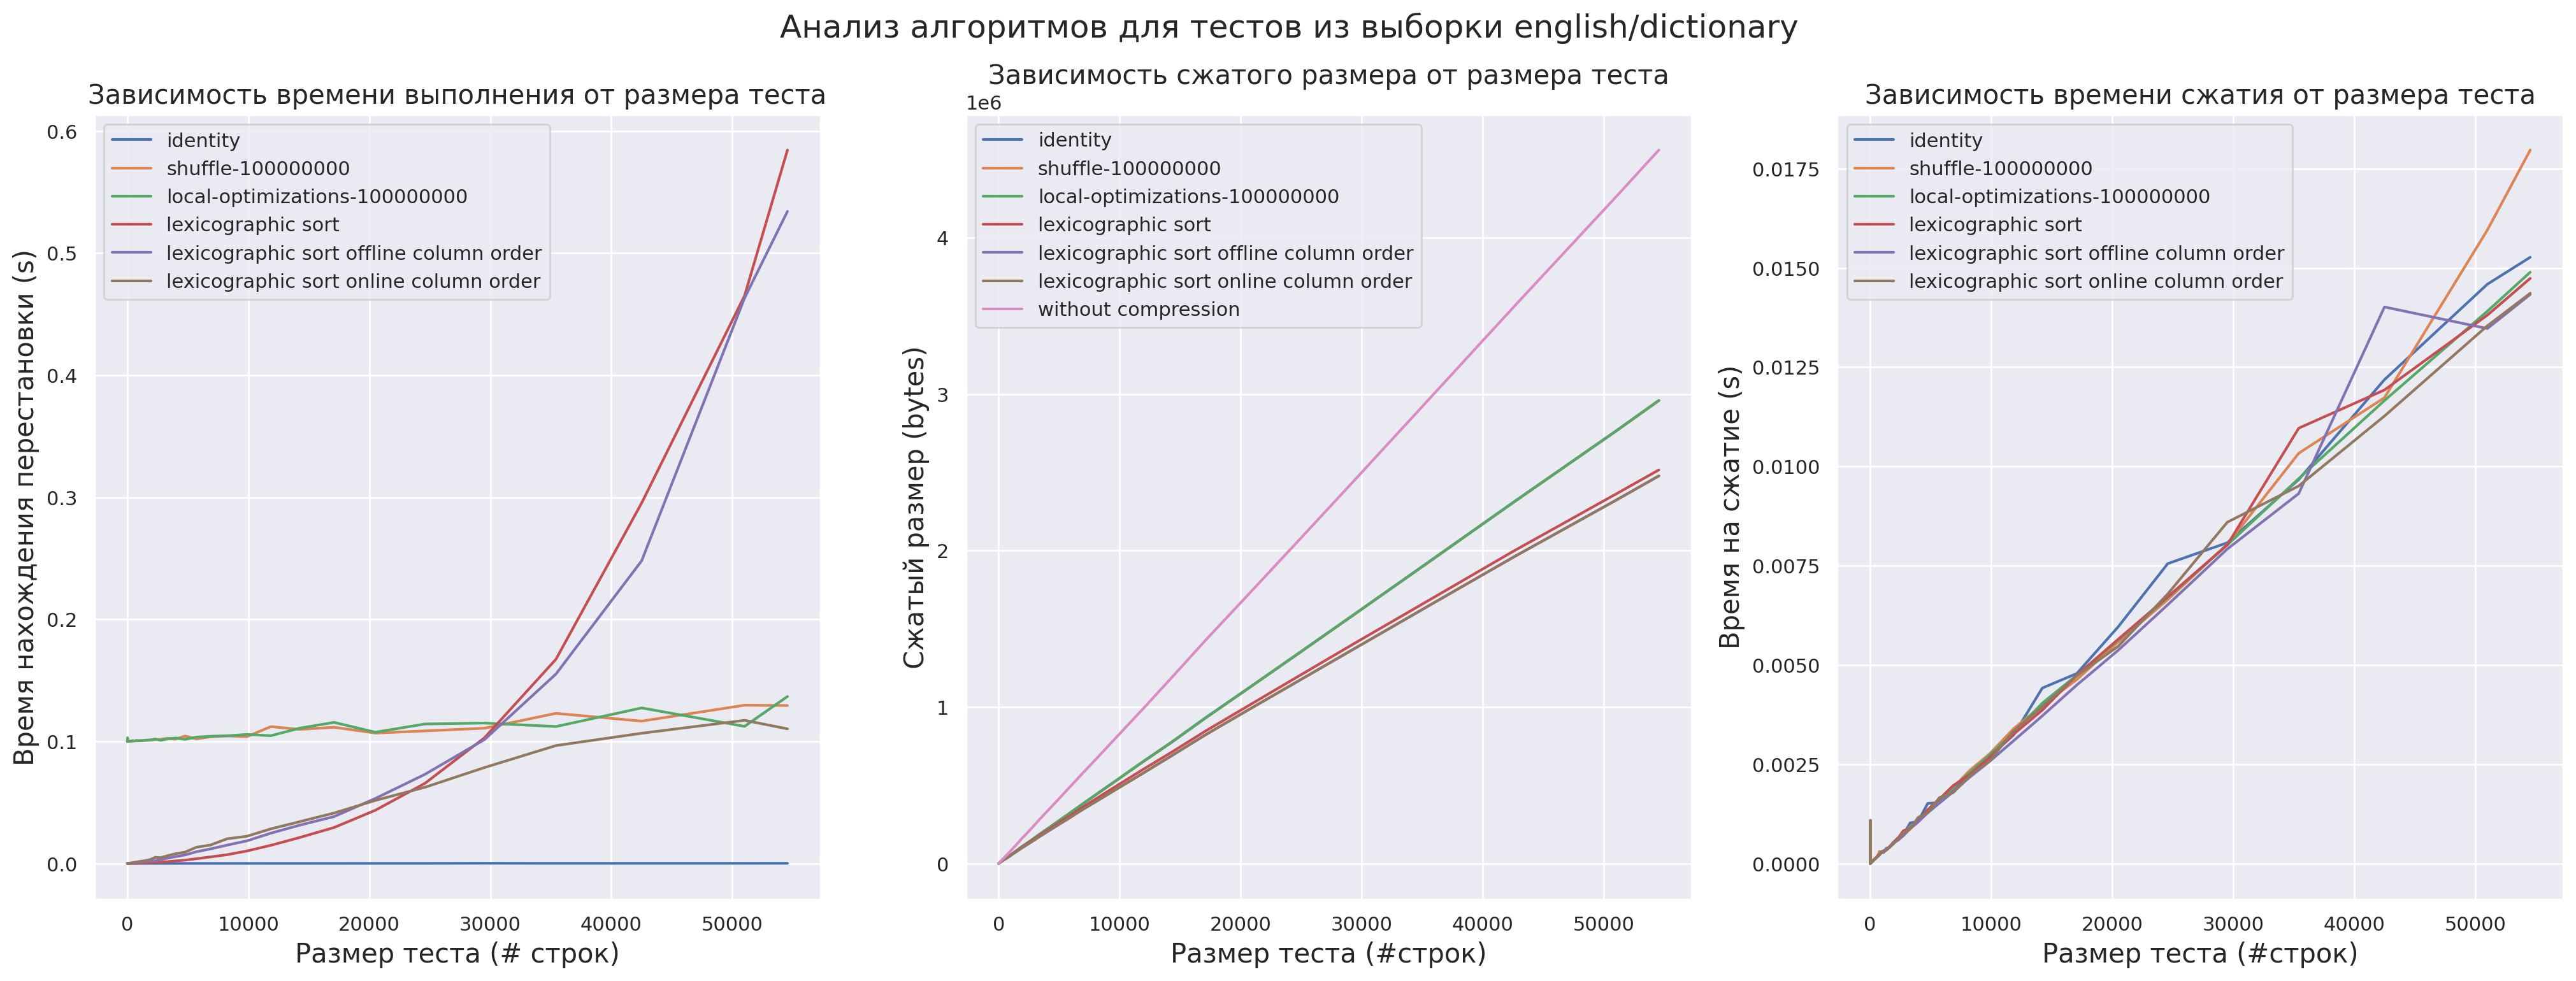

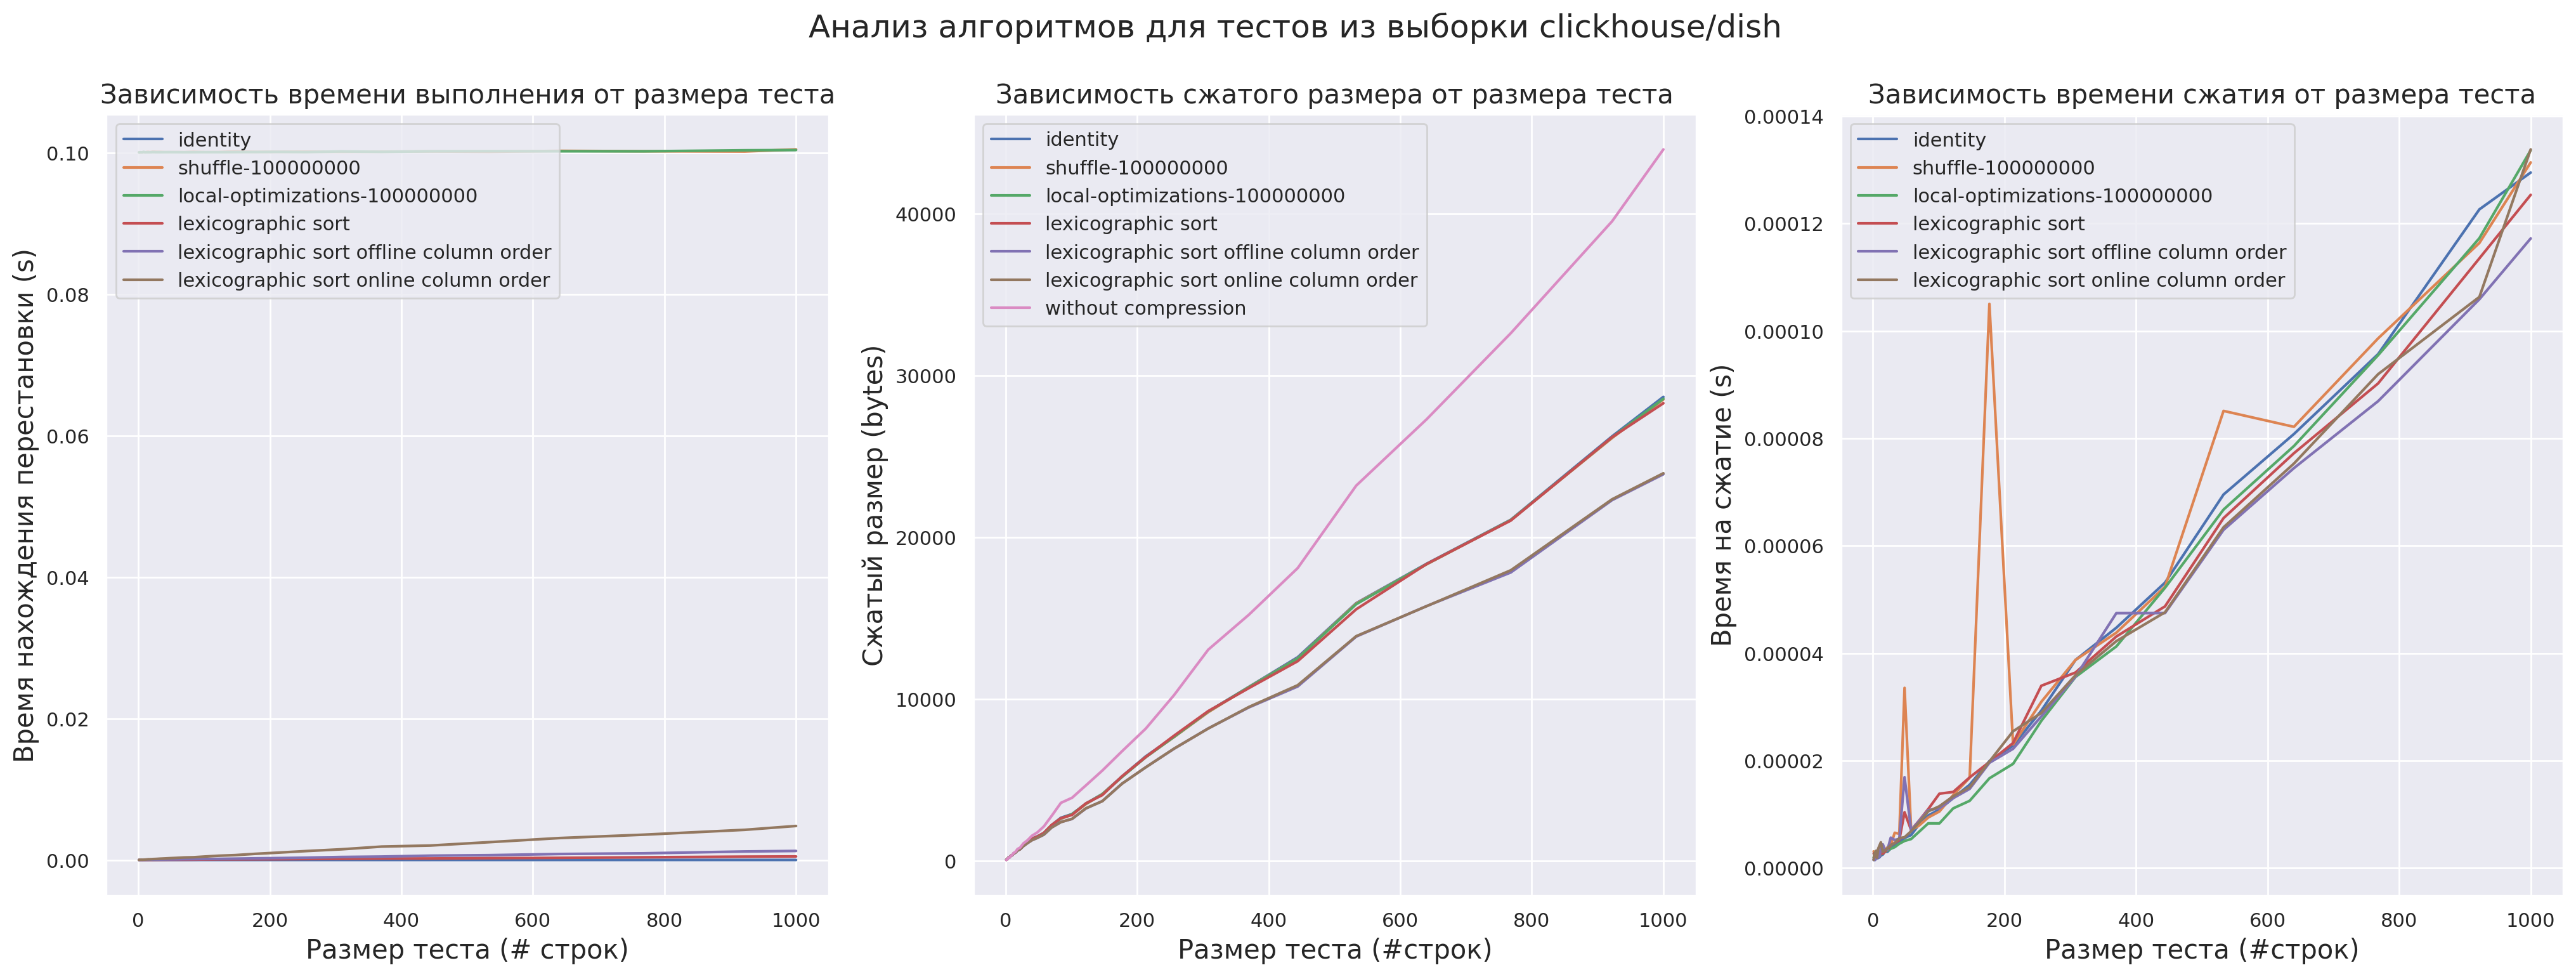

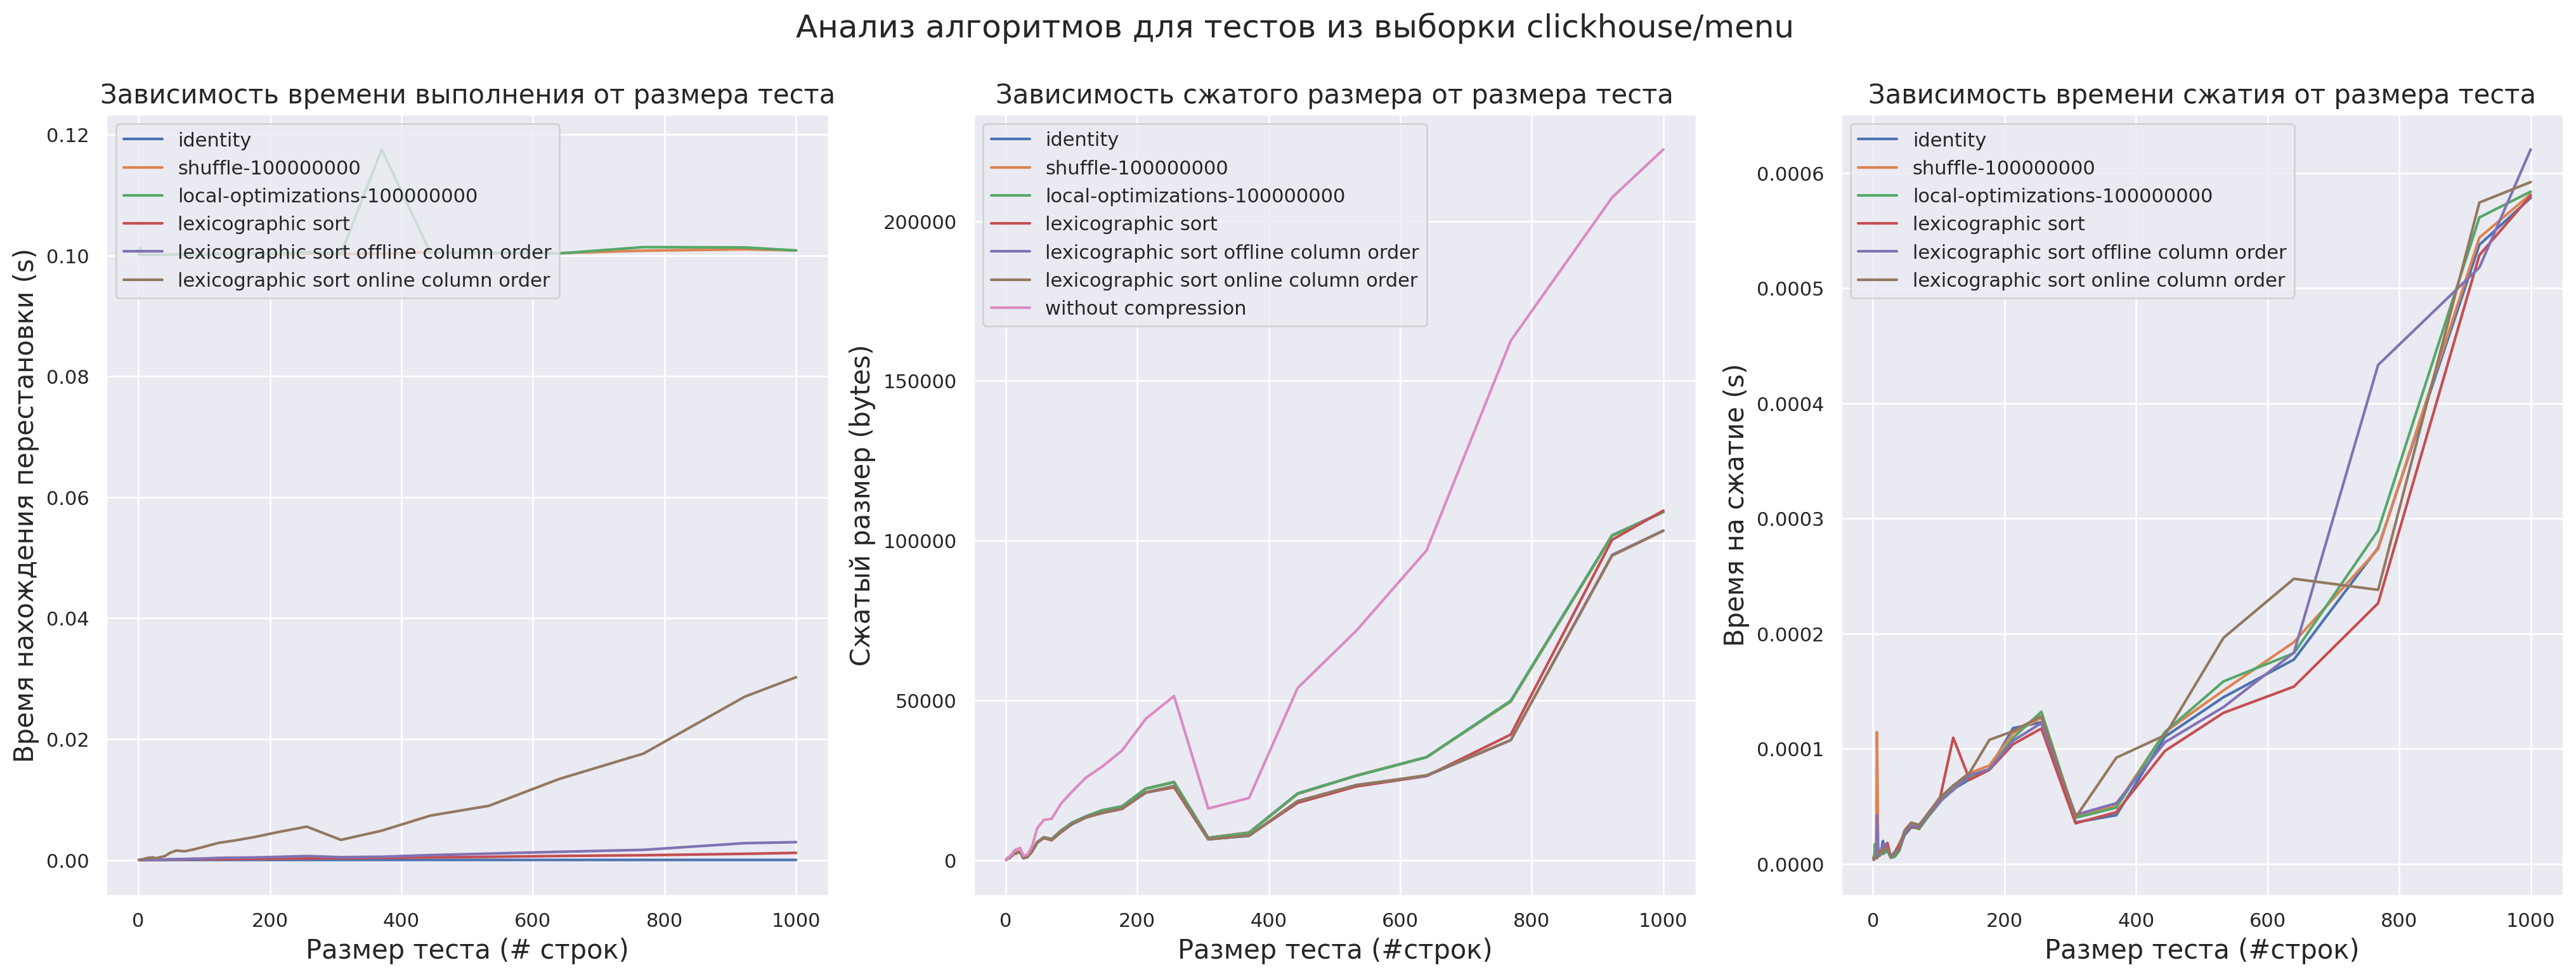

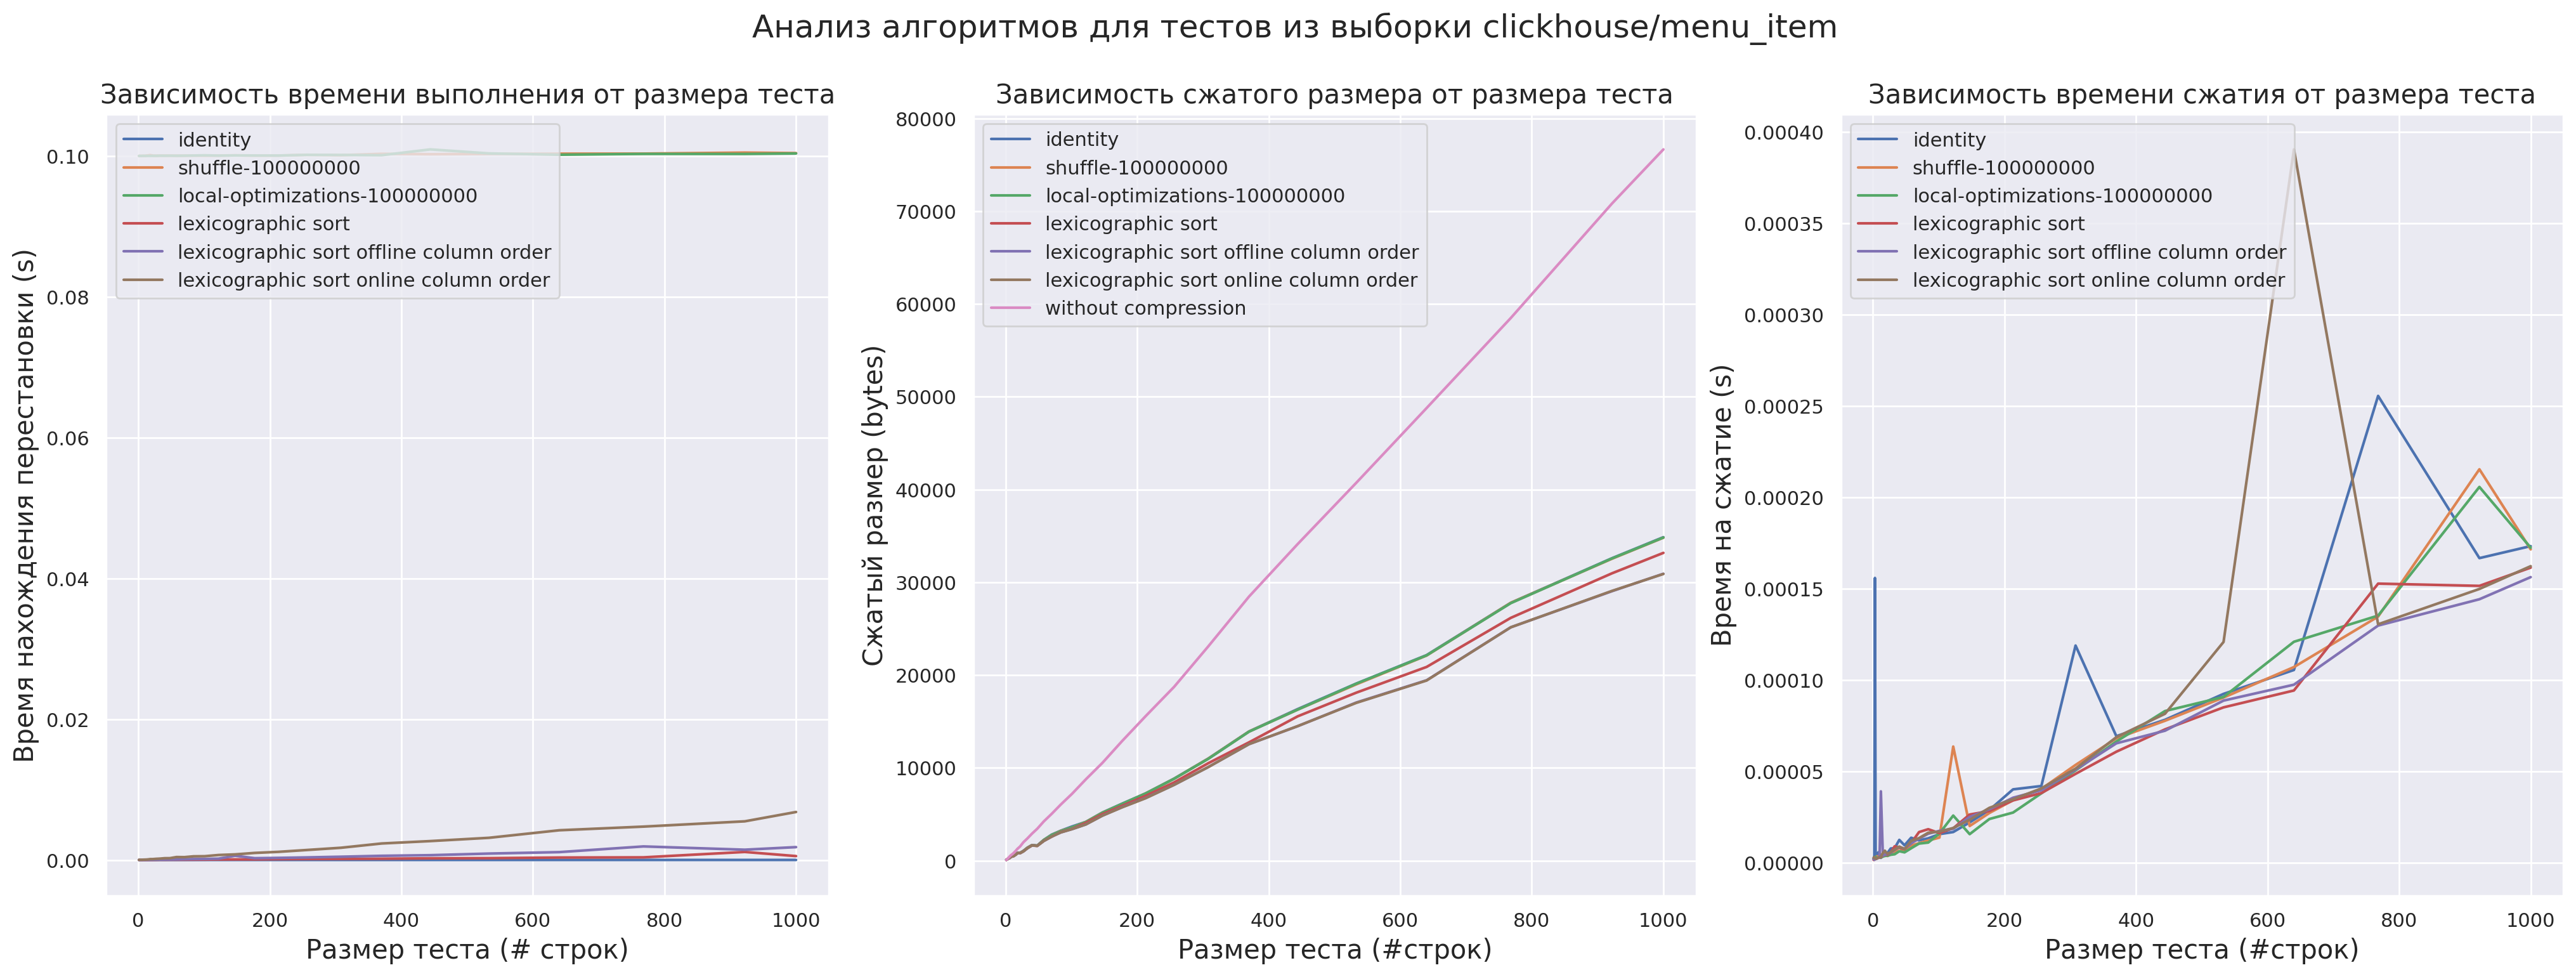

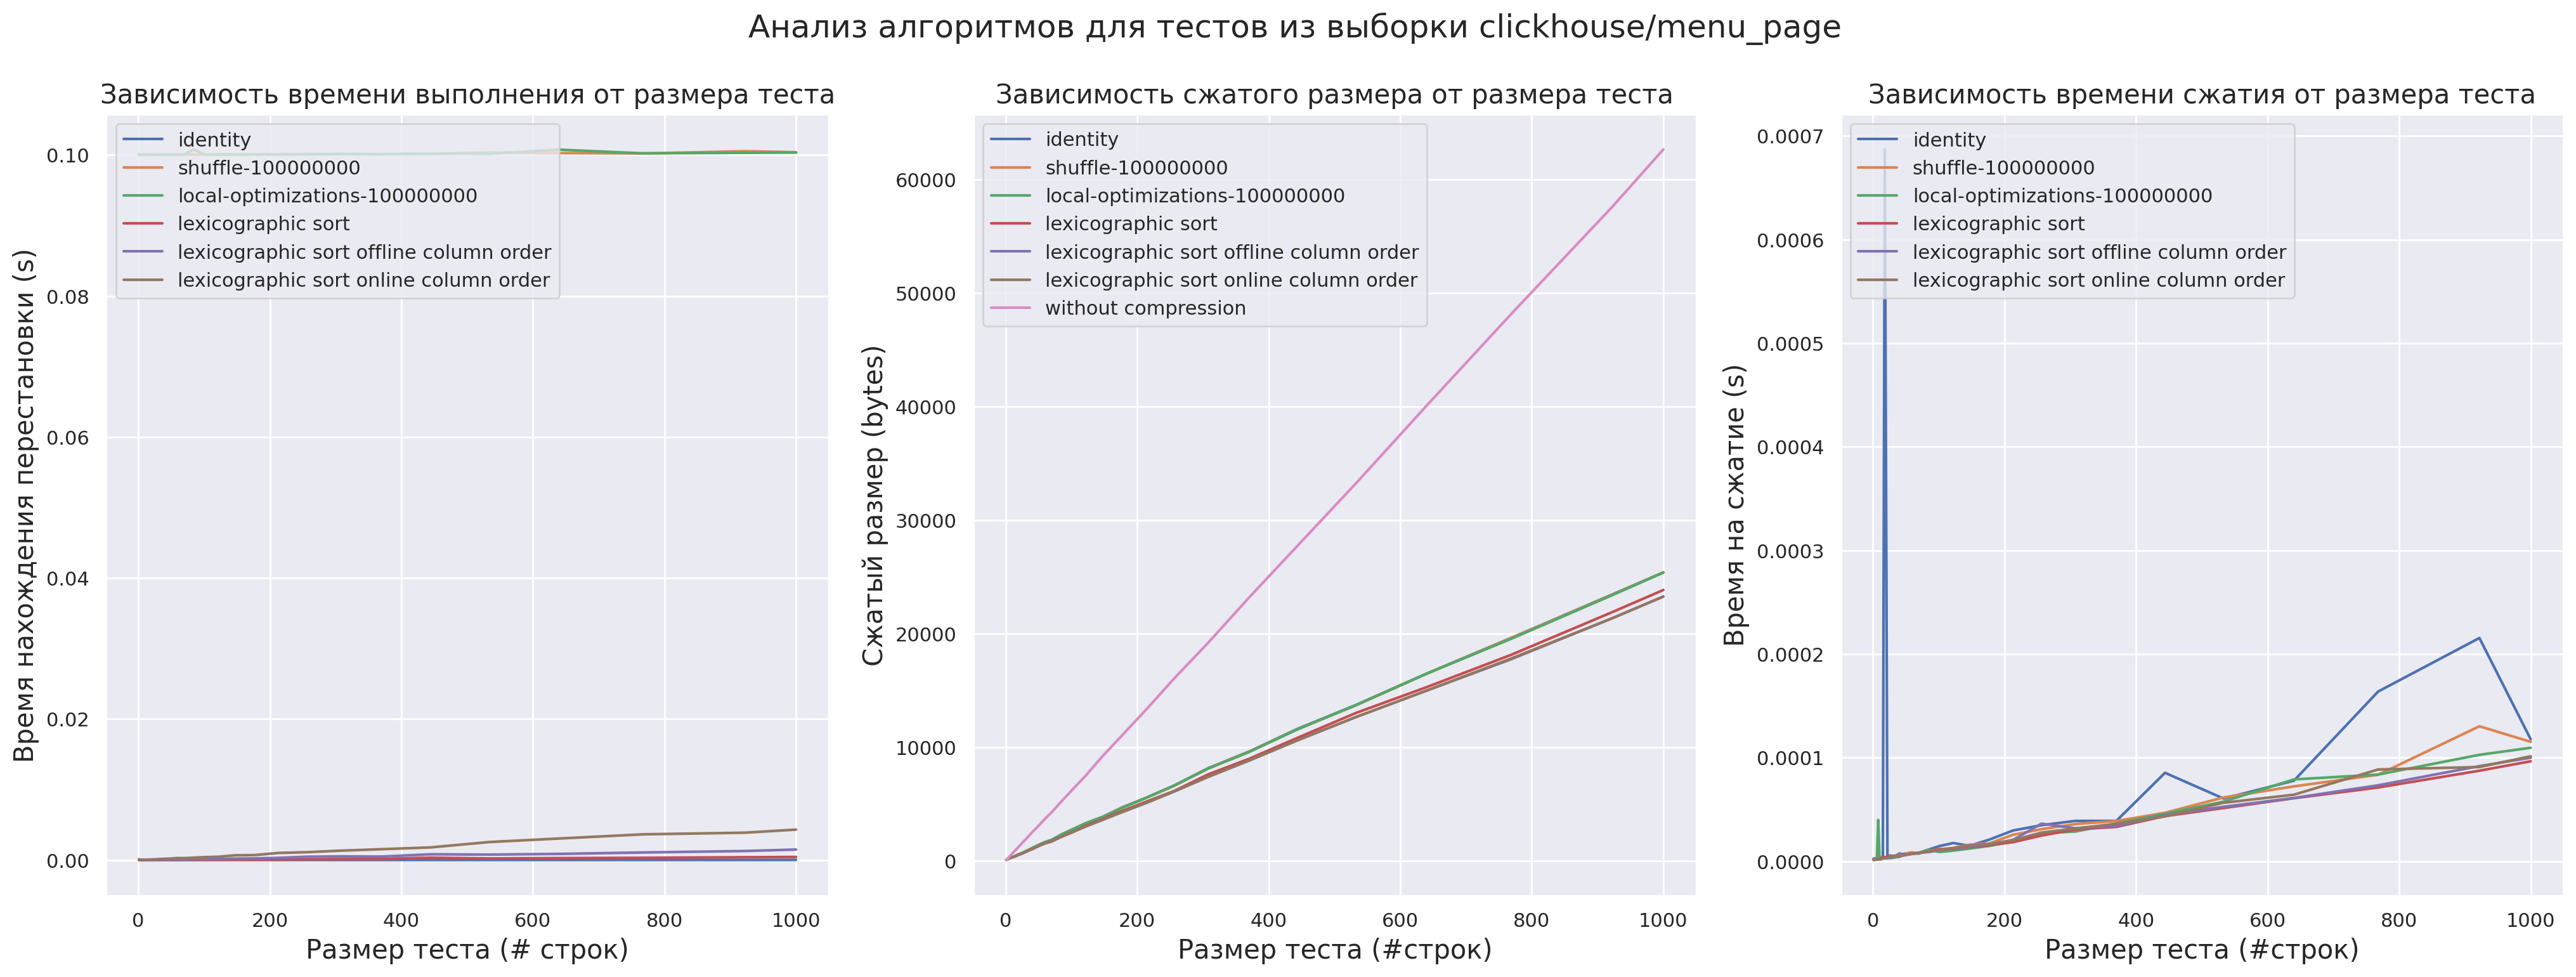

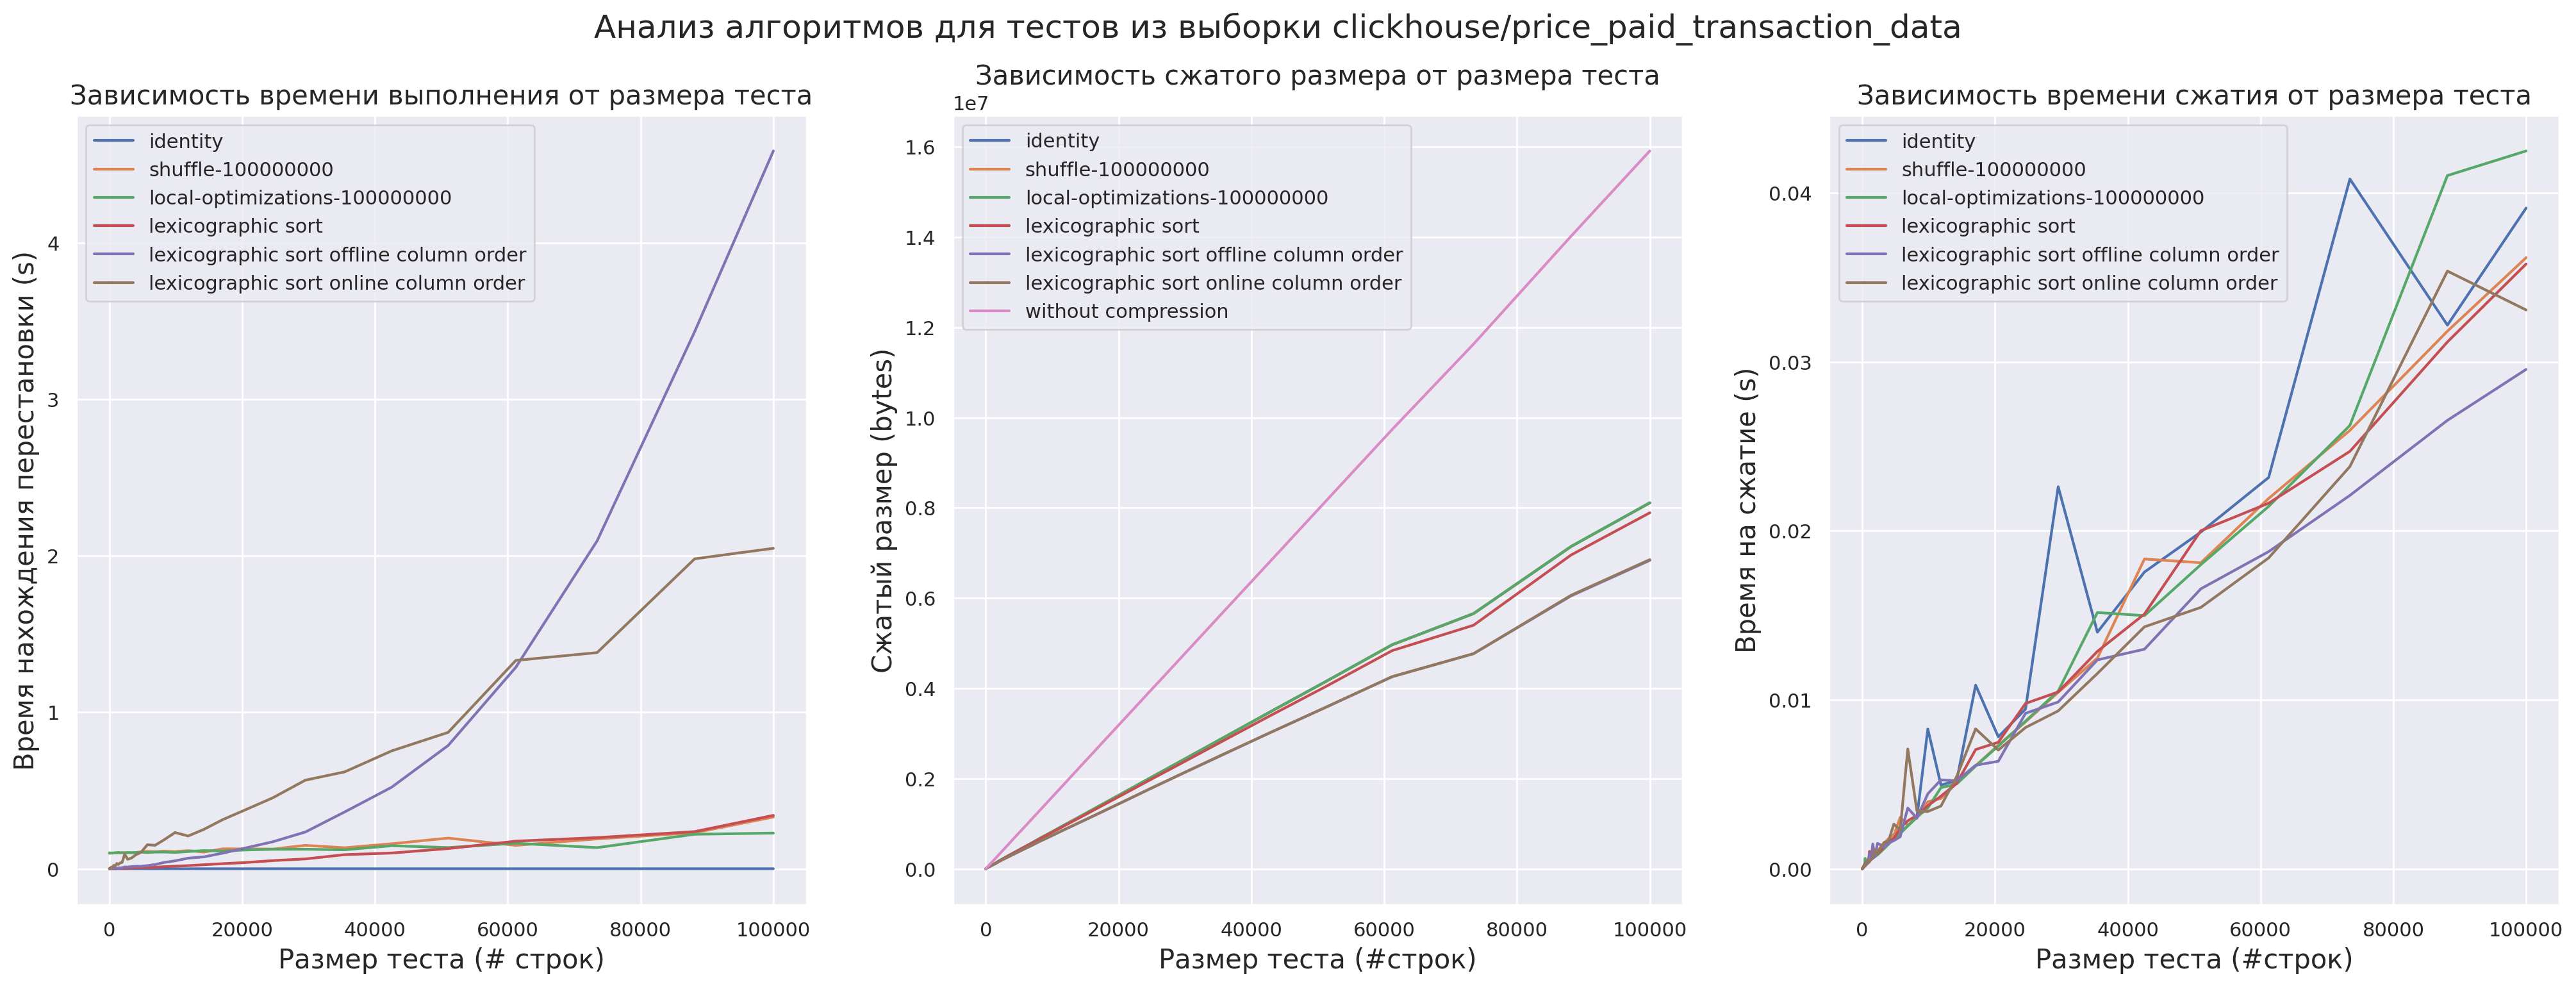

In [8]:
for test_type in tests_types:
    plot_for_test_type(test_type)
